In [1]:
import pandas as pd

In [50]:
df=pd.read_csv("c:/Training/Local Price Tracker and Inflation Montior/data/processed/data.csv")
df.head()
df.shape

(351, 4)

In [3]:
df['date'] = pd.to_datetime(df['date'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   commodity  351 non-null    object        
 1   unit       351 non-null    object        
 2   date       351 non-null    datetime64[ns]
 3   price      351 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 11.1+ KB


In [20]:
latest_date = df['date'].max()
prevoius_date = latest_date.replace(year=latest_date.year - 1)

In [21]:
yearly_data = df[df['date'].isin([prevoius_date, latest_date])].drop(columns=['date'])

In [22]:
yearly_data

,commodity,unit,price
0,Rice,1 Kg,42.87
1,Wheat,1 Kg,31.51
2,Atta (Wheat),1 Kg,36.76
3,Gram Dal(Bharat Dal Adjusted),1 Kg,83.06
4,Gram Dal,1 Kg,87.13
...,...,...,...
346,Coriander (whole),250 gm,28.13
347,Cummin Seed (whole),100 gm,63.40
348,Red Chillies (whole),100 gm,39.86
349,Turmeric (powder),50 gm,31.35


In [48]:
variance_data = (
       yearly_data
      .groupby("commodity")["price"]
      .var()
      .reset_index(name="variance")
)

In [49]:
variance_data


,commodity,variance
0,Atta (Wheat),0.64980
1,Bajra (whole),0.11045
2,Banana,0.31205
3,Besan,3.38000
4,Black Pepper (whole),121.68000
5,Brinjal,8.28245
6,Butter (Pasteurised),4.03280
7,Coriander (whole),40.77045
8,Cummin Seed (whole),230.05125
9,Desi Ghee,629.06045


In [47]:
df["commodity"].value_counts()

commodity
Rice                             9
Wheat                            9
Atta (Wheat)                     9
Gram Dal(Bharat Dal Adjusted)    9
Gram Dal                         9
Tur/Arhar Dal                    9
Urad Dal                         9
Moong Dal                        9
Masoor Dal                       9
Sugar                            9
Milk (₹/ltr)                     9
Groundnut Oil (Packed)           9
Mustard Oil (Packed)             9
Vanaspati (Packed)               9
Soya Oil (Packed)                9
Sunflower Oil (Packed)           9
Palm Oil (Packed)                9
Gur                              9
Tea Loose                        9
Salt Pack (Iodised)              9
Potato                           9
Onion                            9
Tomato                           9
Bajra (whole)                    9
Jowar (whole)                    9
Maida (wheat)                    9
Ragi (whole)                     9
Suji (whole)                     9
Besan     

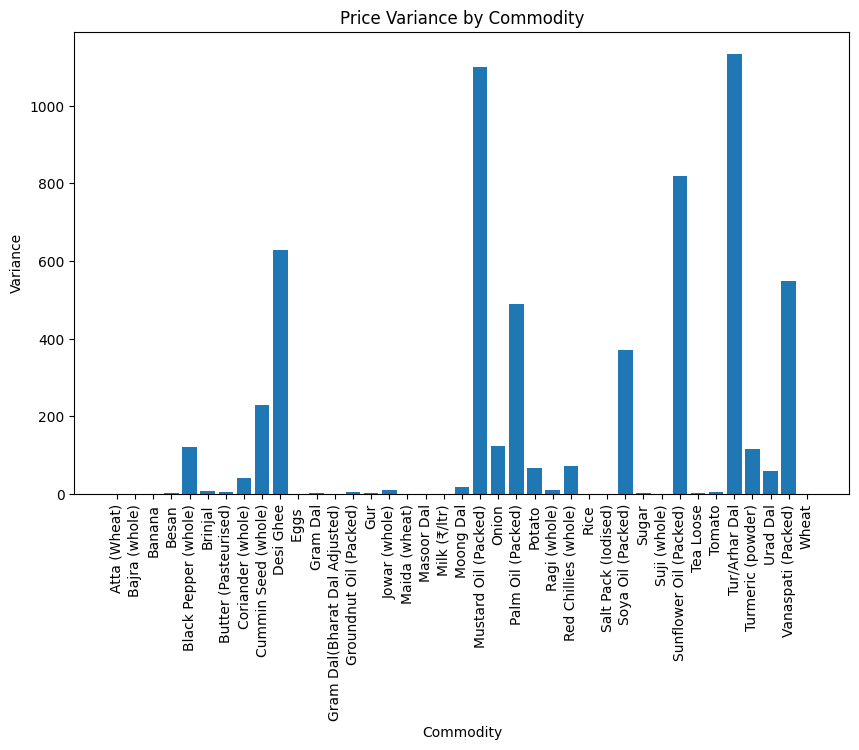

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(variance_data['commodity'], variance_data['variance'])
plt.xlabel('Commodity')
plt.ylabel('Variance')  
plt.title('Price Variance by Commodity')
plt.xticks(rotation=90)
plt.show()


In [54]:
volality_dataset=(
       yearly_data
      .groupby("commodity")["price"]
      .agg(std_dev="std", mean_price="mean")
      .reset_index()
)

In [55]:
volality_dataset

,commodity,std_dev,mean_price
0,Atta (Wheat),0.806102,36.190
1,Bajra (whole),0.332340,38.025
2,Banana,0.558614,50.185
3,Besan,1.838478,98.280
4,Black Pepper (whole),11.030866,95.160
5,Brinjal,2.877925,44.695
6,Butter (Pasteurised),2.008183,60.590
7,Coriander (whole),6.385174,32.645
8,Cummin Seed (whole),15.167440,52.675
9,Desi Ghee,25.081078,645.975


In [57]:
# Add Coefficient of Variation
volality_dataset["cv"] = volality_dataset["std_dev"] / volality_dataset["mean_price"]
volality_dataset

,commodity,std_dev,mean_price,cv
0,Atta (Wheat),0.806102,36.190,0.022274
1,Bajra (whole),0.332340,38.025,0.008740
2,Banana,0.558614,50.185,0.011131
3,Besan,1.838478,98.280,0.018707
4,Black Pepper (whole),11.030866,95.160,0.115919
5,Brinjal,2.877925,44.695,0.064390
6,Butter (Pasteurised),2.008183,60.590,0.033144
7,Coriander (whole),6.385174,32.645,0.195594
8,Cummin Seed (whole),15.167440,52.675,0.287944
9,Desi Ghee,25.081078,645.975,0.038827


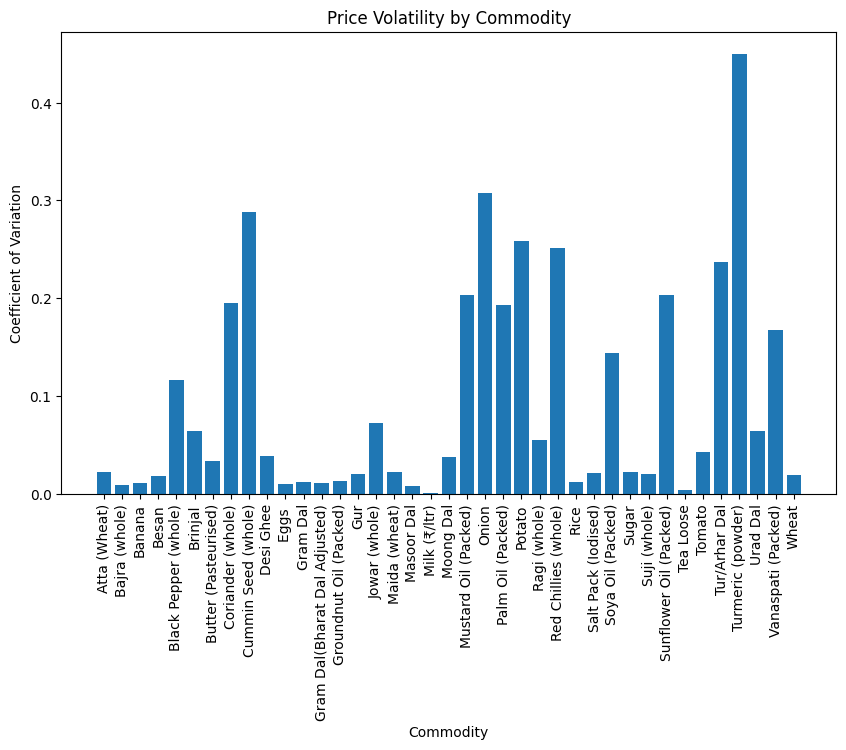

In [58]:
plt.figure(figsize=(10, 6))
plt.bar(volality_dataset['commodity'], volality_dataset['cv'])
plt.xlabel('Commodity')
plt.ylabel('Coefficient of Variation')
plt.title('Price Volatility by Commodity')
plt.xticks(rotation=90)
plt.show()

In [60]:
top_5_volality_commodities = volality_dataset.nlargest(5, 'cv')['commodity'].tolist()
top_5_volality_commodities

['Turmeric (powder)',
 'Onion',
 'Cummin Seed (whole)',
 'Potato',
 'Red Chillies (whole)']

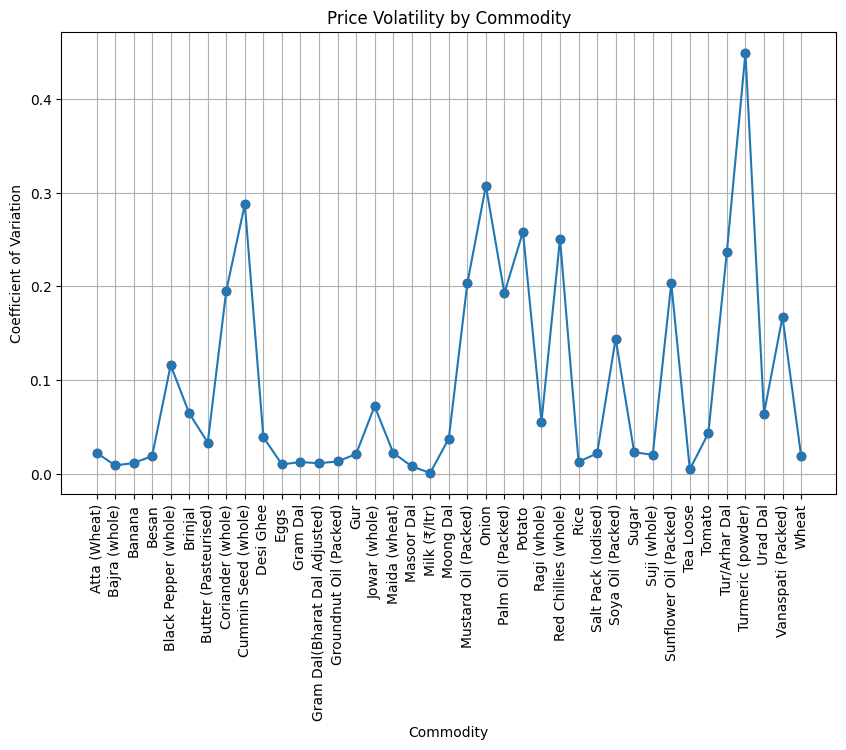

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(volality_dataset['commodity'], volality_dataset['cv'], marker='o')
plt.scatter(volality_dataset['commodity'], volality_dataset['cv'], color='red')
plt.xlabel('Commodity')
plt.ylabel('Coefficient of Variation')
plt.title('Price Volatility by Commodity')
plt.xticks(rotation=90)
plt.grid()
plt.show()